# Support Vector Machine Tutorial.
## Multi-class classifier



# Iris Dataset
## https://archive.ics.uci.edu/ml/datasets/iris
# Fields description follow:
## 1. sepal length in cm
## 2. sepal width in cm
## 3. petal length in cm
## 4. petal width in cm
## 5. class:
## -- Iris Setosa
## -- Iris Versicolour
## -- Iris Virginica



In [1]:
from sklearn import svm
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt # for plotting data and creating different charts.
import numpy as np # for math and arrays
import pandas as pd # data from for the data.
import seaborn as sns # for plotting.

In [2]:
all_ds = pd.read_csv("health_data_numerical.csv")
all_ds

,pulse,temp,Health Status Numeric
0,70,39.4,2
1,90,36.2,4
2,76,36.8,4
3,91,37.4,3
4,98,37.3,3
...,...,...,...
995,56,36.6,0
996,82,38.4,2
997,86,39.3,2
998,92,36.6,4


In [3]:
print(f'Number of rows/examples and columns in the dataset: {all_ds.shape}')

Number of rows/examples and columns in the dataset: (1000, 3)


In [4]:
# Summary of information on the dataset.
all_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   pulse                  1000 non-null   int64  
 1   temp                   1000 non-null   float64
 2   Health Status Numeric  1000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


# Cleaning the data.

In [5]:
print("Display NA values in each columns: ")
all_ds.isna().sum(axis=0)

Display NA values in each columns: 


pulse                    0
temp                     0
Health Status Numeric    0
dtype: int64

In [6]:
print("Display NULL values in each columns: ")
all_ds.isnull().sum()

Display NULL values in each columns: 


pulse                    0
temp                     0
Health Status Numeric    0
dtype: int64

In [7]:
all_ds = all_ds.dropna()

In [8]:

all_ds = all_ds.sample(frac=1) # This will randomly shuffle the rows to make sure the data is not sorted. (if the data is sorted then we may end up with test dataset from one or two classes only)


# Split the data into train/test splits.

In [9]:
# Split the data into 60% train and 40% test (later will divide the test to test and validate.)
train_dataset, temp_test_dataset =  train_test_split(all_ds, test_size=0.4)

print( train_dataset.shape )
print( temp_test_dataset.shape )

(600, 3)
(400, 3)


In [10]:
# Split the test_dataset dataframe to 50% test and 50% validation. [this will divide the dataset into 60% train, 20% validate, and 20% test]
test_dataset, valid_dataset =  train_test_split(temp_test_dataset, test_size=0.5)
print( test_dataset.shape )
print( valid_dataset.shape )

(200, 3)
(200, 3)


In [11]:
print(f"Display the datatype of the test_dataset: {type(test_dataset)}")
print(f" Trai dataset       : {train_dataset.shape}")
print(f" Test dataset       : {test_dataset.shape}")
print(f" Validation dataset : {valid_dataset.shape}")

Display the datatype of the test_dataset: <class 'pandas.core.frame.DataFrame'>
 Trai dataset       : (600, 3)
 Test dataset       : (200, 3)
 Validation dataset : (200, 3)


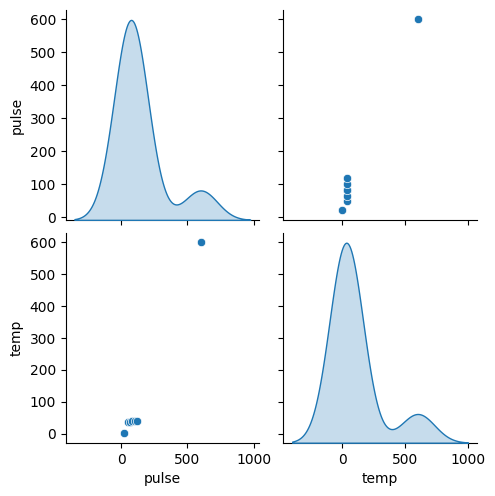

In [12]:
# Plot the relationship between each two variables to spot anything incorrect.
train_stats = train_dataset.describe()
train_stats.pop("Health Status Numeric")
sns.pairplot(train_stats[train_stats.columns], diag_kind="kde") # or diag_kind='reg'


In [13]:
# Statistics on the train dataset to make sure it is in a good shape. (you may display the same stat for test and validate)
train_stats = train_dataset.describe()
train_stats.pop("Health Status Numeric")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
pulse,600.0,83.553333,20.744341,50.0,65.75,82.00,102.0,120.0
temp,600.0,38.000500,1.198866,36.0,36.90,37.95,39.1,40.0


In [14]:

train_labels = train_dataset.pop('Health Status Numeric')
test_labels = test_dataset.pop('Health Status Numeric')
valid_labels = valid_dataset.pop('Health Status Numeric')

# Data Normalization/Scaling
## Subtract the mean of the training data and divide by the standard deviation of the training data.

In [15]:
# define a function to normalize the data set.
def norm(x):
#     print(x)
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_valid_dataset = norm(valid_dataset)


In [17]:
import pandas as pd
p_rate=int(input("Enter the pulse rate:"))
tp=float(input("Enter the temp:"))
# data={"pulse":p_rate,"temp":tp}
data = {'pulse':[p_rate],'temp':[tp]}

print(data)

df = pd.DataFrame(data)
def norm(x):
    y=(x - train_stats['mean']) / train_stats['std']
    print(y)
#     print(x)

    return y


norm(df)


Enter the pulse rate:12
Enter the temp:45
{'pulse': [12], 'temp': [45.0]}
      pulse      temp
0 -3.449294  5.838436


,pulse,temp
0,-3.449294,5.838436


In [18]:
# show a sample of the data after normalized
normed_train_data.head(10)

,pulse,temp
328,-0.123086,0.416644
382,0.600003,1.501002
901,0.792827,-0.751127
833,1.371298,-1.084776
336,-0.749763,-0.834539
838,1.274886,-1.418424
134,0.985650,-0.334066
232,-1.521057,-0.000417
123,-0.556939,-0.083829
493,0.889238,-1.001363


# Training the model 
## more details here:
## https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [19]:
#Create a svm Classifier
model = svm.SVC(C = 1, # reg paramater
                kernel='linear', #kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
               ) # Linear Kernel

#Train the model using the training sets
model.fit(normed_train_data, train_labels)

#Predict the response for test dataset
y_pred = model.predict(normed_test_data)

In [20]:
example_batch = normed_test_data[:1]

print(type(example_batch))
# data={"heart_rate":[0.898852],"Temprature":[0.074608]}
# data = {
#   "calories": [420, 380, 390],
#   "duration": [50, 40, 45]
# }

#load data into a DataFrame object:
# df = pd.DataFrame(data)
print(example_batch)
#example_batch1.info()
example_result = model.predict(example_batch)
print('predicted values: ')
example_result

<class 'pandas.core.frame.DataFrame'>
        pulse      temp
967 -0.412321 -0.584302
predicted values: 


array([3], dtype=int64)

In [21]:
pred = model.predict(df)
pred

array([2], dtype=int64)

In [29]:
import pandas as pd
p_rate=int(input("Enter the pulse rate:"))
tp=float(input("Enter the temp:"))
# data={"pulse":p_rate,"temp":tp}
data = {'pulse':[p_rate],'temp':[tp]}

print(data)

df = pd.DataFrame(data)
def norm(x):
    y=(x - train_stats['mean']) / train_stats['std']
    return y


y=norm(df)

import pickle
with open('model_svm3.pkl','wb') as f:
  pickle.dump(model,f)

example_result = model.predict(y)
print('predicted values: ')
example_result


Enter the pulse rate:111
Enter the temp:37
{'pulse': [111], 'temp': [37.0]}
predicted values: 


array([1], dtype=int64)

In [23]:
import pickle
with open('model_svm2.pkl','wb') as f:
  pickle.dump(model,f)

# See how the training went

In [24]:
from sklearn import metrics
y_pred = model.predict(normed_train_data)
print("Accuracy:",metrics.accuracy_score(train_labels, y_pred))

Accuracy: 0.955


In [25]:
y_pred = model.predict(normed_valid_dataset)
print("Accuracy:",metrics.accuracy_score(valid_labels, y_pred))

Accuracy: 0.94


In [26]:
y_pred = model.predict(normed_test_data)
print("Accuracy:",metrics.accuracy_score(test_labels, y_pred))

Accuracy: 0.985


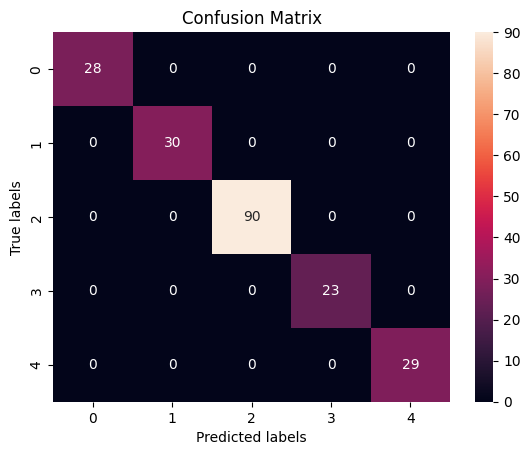

In [27]:
from sklearn.metrics import confusion_matrix


ax= plt.subplot()
predict_results = model.predict(normed_test_data)

cm = confusion_matrix(predict_results, predict_results)

sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
# ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative']);
